Adam Ten Hoeve  
COMP 4448 - Data Science Tools 2  
Assignment 6

In [44]:
# Load necesary libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Question 1

Use the entire health data provided on canvas for this question. Here are the first few rows of the data. 
 
The variables are described as follows:
age  =  Age in years divided by 100.
income = Annual income in tens of thousands of dollars.
illness = Number of illnesses in past 2 weeks.
reduced = Number of days of reduced activity in past 2 weeks due to illness or injury.
health = General health questionnaire score using Goldberg's method. Note that higher health scores indicate worse health condition. 
Use the age, income, illness and reduced variables as input variables and use the health variable as an output variable. You will find the parameters or coefficients (intercept and slopes) of a regression equation that models the relationship between the input and output variables. First use the StandardScaler() in sklearn to standardize the input data before you run your algorithm or fit your model. 

In [9]:
# Load the data
health_df = pd.read_csv("Health_Data.csv", header=0)
# Scale the predictors
scaler = StandardScaler()
health_df[["age", "income", "illness", "reduced"]] = scaler.fit_transform(health_df[["age", "income", "illness", "reduced"]])
health_df.head()

,age,income,illness,reduced,health
0,-1.056765,-0.089896,-0.312123,1.086862,1
1,-1.056765,-0.360993,-0.312123,0.394185,1
2,-1.056765,0.858945,1.132944,-0.298492,0
3,-1.056765,-1.174285,-0.312123,-0.298492,0
4,-1.056765,-0.360993,0.410410,1.433200,1


a)	Implement batch gradient descent from scratch to find the regression parameters as in the pseudo code below:

In [20]:
# Initialize the hyperparams for the gradient descent
alpha = 0.01
iterations = 10000
n = health_df.shape[0]
# Initialize the intercept
b0 = 0
# Initialize all the feature coefficients
bAge, bIncome, bIllness, bReduced = 0, 0, 0, 0
# Initalize the data vectors for each feature and the response
xAge = health_df["age"]
xIncome = health_df["income"]
xIllness = health_df["illness"]
xReduced = health_df["reduced"]
y = health_df["health"]
# Begin gradient descent algorithm
for i in range(iterations):
    # Predict the y values
    pred_y = b0 + bAge*xAge + bIncome*xIncome + bIllness*xIllness + bReduced*xReduced
    # Calculate the errors
    resids = y - pred_y
    # Estimate the parameters from the errors
    b0 = b0 + alpha*np.sum(resids)/n
    bAge = bAge + alpha*np.sum(resids*xAge)/n
    bIncome = bIncome + alpha*np.sum(resids*xIncome)/n
    bIllness = bIllness + alpha*np.sum(resids*xIllness)/n
    bReduced = bReduced + alpha*np.sum(resids*xReduced)/n
# Display the learned coefficients
print(b0, bAge, bIncome, bIllness, bReduced)

1.2175337186897772 -0.17273499897030511 -0.10539057012366403 0.6849093812779409 0.45714456103590073


b)	Now, use a vectorized or matrix implementation instead of having a line of code for each x or b. That mean, you can a create a vector of b’s and a feature matrix, X where you have an additional column for x0 whose values are 1’s. x0 corresponds to b0. You can still implement it as described in the code above. 

In [50]:
# Initialize the hyperparams for the gradient descent
alpha = 0.01
iterations = 10000
n = health_df.shape[0]
# Initialize the intercept
b0 = 0
# Initialize the vector of coefficients
b = np.array([0, 0, 0, 0]).reshape(1, 4)
# Initalize the feature matrix
X = health_df[["age", "income", "illness", "reduced"]].to_numpy()
# Begin gradient descent algorithm
for i in range(iterations):
    # Predict the y values
    pred_y = b0 + np.matmul(X, b.T).reshape(1, -1)[0]
    # Calculate the errors
    resids = y - pred_y
    # Estimate the parameters from the errors
    b0 = b0 + alpha*np.sum(resids)/n
    b = b + np.matmul(resids, X)/n
# Display the learned coefficients
print(b0, b)

1.2175337186897772 [[-0.172735   -0.10539057  0.68490938  0.45714456]]


c)	Use the scikit-learn package to implement the stochastic gradient descent to find the parameters of the regression equation.

In [58]:
sgdr = SGDRegressor()
sgdr.fit(X, y)
print(sgdr.intercept_, sgdr.coef_)

[1.22692546] [-0.12095541 -0.07745132  0.70822908  0.53091082]


# Question 2
You will implement a multiple regression from a statistical perspective to explore the relationship between the input variables and the output variable. You will use the health data again.  

a)	Use the statsmodels package (https://www.statsmodels.org/stable/regression.html#examples) to implement a multiple linear regression using the entire health data to get a more detailed regression summary. 

In [63]:
# Add a constant to the health dataset
X = sm.add_constant(X)
# Fit the model to the data
model = sm.OLS(y, X)
results = model.fit()
# Determine the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 health   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          2.35e-220
Time:                        19:04:12   Log-Likelihood:                -10762.
No. Observations:                5190   AIC:                         2.153e+04
Df Residuals:                    5185   BIC:                         2.157e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2175      0.027     45.558      0.000       1.165       1.270
x1            -0.1727      0.028     -6.120      0.000      -0.228      -0.117
x2            -0.1054      0.028     -3.777      0.000      -0.160      -0.051
x3             0.6849      0.028     24.442      0.000       0.630       0.740
x4             0.4571      0.027     16.671      0.000       0.403       0.511
==============================================================================
Omnibus:                     2321.918   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12281.302
Skew:                           2.126   Prob(JB):                         0.00
Kurtosis:                       9.222   Cond. No.                         1.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Test indidivual SLR models to find the best parameter
import statsmodels.formula.api as smf
formula1 = "health ~ illness"
smf.ols(formula1, data=health_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 health   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     773.0
Date:                Sat, 07 Aug 2021   Prob (F-statistic):          1.04e-158
Time:                        19:31:38   Log-Likelihood:                -10914.
No. Observations:                5190   AIC:                         2.183e+04
Df Residuals:                    5188   BIC:                         2.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2175      0.028     44.256      0.000       1.164       1.271
illness        0.7649      0.028     27.803      0.000       0.711       0.819
==============================================================================
Omnibus:                     2401.213   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12779.123
Skew:                           2.213   Prob(JB):                         0.00
Kurtosis:                       9.285   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e)	Extract the residuals of the model and test the assumptions normality and homogeneity of variance for the regression model. Are the assumptions met? Use reg.resid syntax to extract the residuals

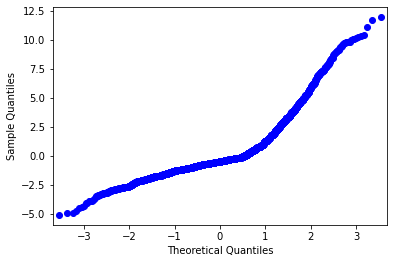

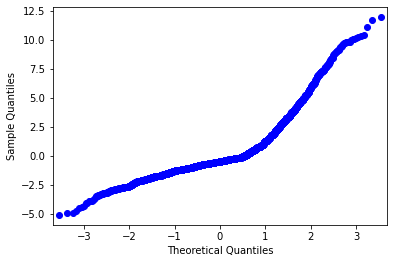

In [73]:
# Extract the residuals
resids = results.resid
sm.qqplot(resids)

f)	To further verify the normality assumption, create a histogram for the residuals. Does the histogram look like a normal distribution? 

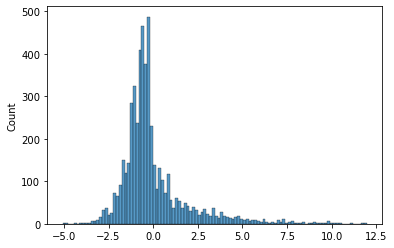

In [79]:
sns.histplot(resids)

g)	Test the linearity assumption by creating separate scatter plots for each input variable versus output variable. According to your plots, are the linearity assumptions met? 

Text(0, 0.5, 'Health')

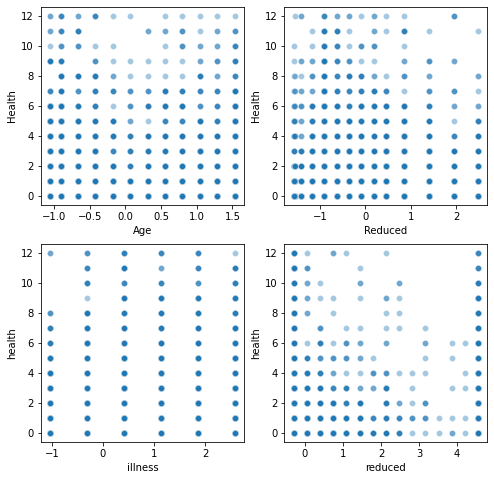

In [91]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
# Health vs Age
sns.scatterplot(x=health_df["age"], y=y, alpha=0.4, ax=ax[0,0])
ax[0,0].set_xlabel("Age")
ax[0,0].set_ylabel("Health")
# Health vs Income
sns.scatterplot(x=health_df["income"], y=y, alpha=0.4, ax=ax[0,1])
ax[0,1].set_xlabel("Income")
ax[0,1].set_ylabel("Health")
# Health vs Illness
sns.scatterplot(x=health_df["illness"], y=y, alpha=0.4, ax=ax[1,0])
ax[0,1].set_xlabel("Illness")
ax[0,1].set_ylabel("Health")
# Health vs Reduced
sns.scatterplot(x=health_df["reduced"], y=y, alpha=0.4, ax=ax[1,1])
ax[0,1].set_xlabel("Reduced")
ax[0,1].set_ylabel("Health")

h)	Extract the predicted output values from the model, then create a scatter plot of the predicted output versus actual output (from the data provided). This plot is also used to evaluate the accuracy of the model. According to the plot, is your model good for predicting health scores? Use the reg.predict() method to extract the predicted values. 

Text(0, 0.5, 'Predicted')

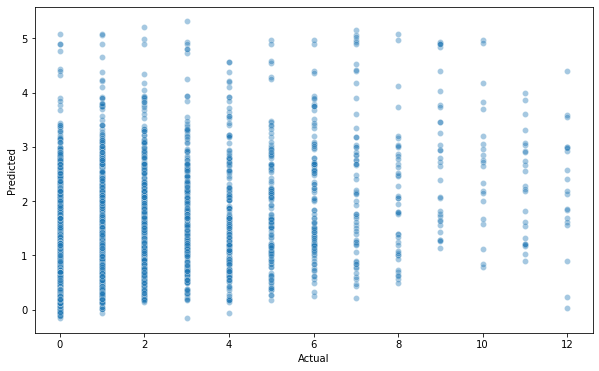

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.scatterplot(x=health_df["health"], y=results.fittedvalues, alpha=0.4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")

i)	Check for multi-collinearity by generating a covariance matrix for the input data . You can use the .cov() method of pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html). Do you think there is multicollinearity among the input variables? 

In [101]:
health_df[["age", "income", "illness", "reduced"]].cov()

,age,income,illness,reduced
age,1.000193,-0.271126,0.205023,0.094763
income,-0.271126,1.000193,-0.148840,-0.047554
illness,0.205023,-0.148840,1.000193,0.218158
reduced,0.094763,-0.047554,0.218158,1.000193


# Question 3

Find your own dataset from an online source with at least 3 input variables. Here is a suggested source of data but you don’t have to use it: https://vincentarelbundock.github.io/Rdatasets/articles/data.html.  There should be one output variable of interest in the data. All the data used for analysis should be continuous. Clean the data as you find necessary, standardize the data and split it into training and test data using an appropriate split ratio. 

In [25]:
# Load in the data
df = pd.read_csv("aids.csv", header=0)
# Clean the columns
# Remove the extra index column
df.drop("Unnamed: 0", axis=1, inplace=True)
# Drop missing values
df.dropna(inplace=True)
# Convert column types as necesary
df = pd.get_dummies(df, columns=["quarter"], drop_first=True)
# Standardize the data
scaler = StandardScaler()
df[["delay", "time", "year"]] = scaler.fit_transform(df[["delay", "time", "year"]])
df.head()

,year,delay,dud,time,y,quarter_2,quarter_3,quarter_4
0,-1.722508,-1.560948,0,-1.687055,2,0,1,0
1,-1.722508,-1.405372,0,-1.687055,6,0,1,0
2,-1.722508,-1.172007,0,-1.687055,0,0,1,0
3,-1.722508,-0.938643,0,-1.687055,1,0,1,0
4,-1.722508,-0.705279,0,-1.687055,1,0,1,0


In [35]:
# Split into features and response
X = df.drop("y", axis=1)
y = df["y"]
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(399, 7)
(399,)
(171, 7)
(171,)


a)	Construct a linear regression model using ordinary least squares method by applying the .LinearRegression() constructor in sklearn and find the training and test accuracy of this model using mean square error (mse

In [37]:
# Create the linear regression model and fit to the training set
lr = LinearRegression().fit(X_train, y_train)

# Predict on the training set
train_preds = lr.predict(X_train)
# Determine the MSE on the training set
n_train = len(X_train)
train_mse = np.sum((y_train - train_preds)**2) / n_train
print("MSE on the training set:", train_mse)

# Predict on the test set
test_preds = lr.predict(X_test)
# Determine the MSE on the test set
n_test = len(X_test)
test_mse = np.sum((y_test - test_preds)**2) / n_test
print("MSE on the test set:", test_mse)

MSE on the training set: 387.6500819236873
MSE on the test set: 419.70556601556973


c)	Fit a lasso regression on the data and check the training and test accuracy of the model using mse. Use the default alpha or penalty constant

In [40]:
# Create a Lasso regression model
lasso = Lasso().fit(X_train, y_train)

# Determine the MSE of the training set
train_preds_lasso = lasso.predict(X_train)
train_mse_lasso = np.sum((y_train - train_preds_lasso)**2) / n_train
print("Lasso Regression MSE on the training set:", train_mse_lasso)

# Determine the MSE of the test set
test_preds_lasso = lasso.predict(X_test)
test_mse_lasso = np.sum((y_test - test_preds_lasso)**2) / n_test
print("Lasso Regression MSE on the test set:", test_mse_lasso)

Lasso Regression MSE on the training set: 405.74373178664933
Lasso Regression MSE on the test set: 452.1139479370937


d)	Fit a ridge regression on the data and check the training and test accuracy of the model. Use the default alpha or penalty constant

In [43]:
# Create a Ridge regression model
ridge = Ridge().fit(X_train, y_train)

# Determine the MSE of the training set
train_preds_ridge = ridge.predict(X_train)
train_mse_ridge = np.sum((y_train - train_preds_ridge)**2) / n_train
print("Ridge Regression MSE on the training set:", train_mse_ridge)

# Determine the MSE of the test set
test_preds_ridge = ridge.predict(X_test)
test_mse_ridge = np.sum((y_test - test_preds_ridge)**2) / n_test
print("Ridge Regression MSE on the test set:", test_mse_ridge)

Ridge Regression MSE on the training set: 387.68546727681166
Ridge Regression MSE on the test set: 420.2845439010731


f)	Tune the alpha hyperparameters of the lasso and ridge regression using any tuning technique of your choice? What is the best alpha value for the lasso regression and what is the best alpha value for the ridge regression?

In [50]:
# Define a sequence of alpha values for the lasso and ridge regressions
param_grid = {"alpha": np.arange(0.05, 1, 0.05)}

# Use GridSearch to find the optimal alpha for Lasso Regression
grid_lasso = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)
print("Best alpha for the lasso regression:", grid_lasso.best_params_)

# Use GridSearch to find the optimal alpha for Ridge Regression
grid_ridge = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)
print("Best alpha for ridge regression:", grid_ridge.best_params_)

Best alpha for the lasso regression: {'alpha': 0.25}
Best alpha for ridge regression: {'alpha': 0.9500000000000001}
